In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataSLSHSLpqr.csv')

df.head(11)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.p, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("p")
plt.ylabel("A3")
plt.subplot(1,3,2)
plt.scatter(df.q, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("q")
plt.ylabel("A3")
plt.subplot(1,3,3)
plt.scatter(df.r, df.A3,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("r")
plt.ylabel("A3")
plt.show()

In [ ]:
cdf = df[['p','q','r','A3']]
cdf.head(9)

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(df)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['p','q','r']])
y = np.asanyarray(train[['A3']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercepts: ', regr.intercept_)

Coefficients:  [[-0.0924156  -0.05803719  0.06330929]]
intercepts:  [1.03868419]


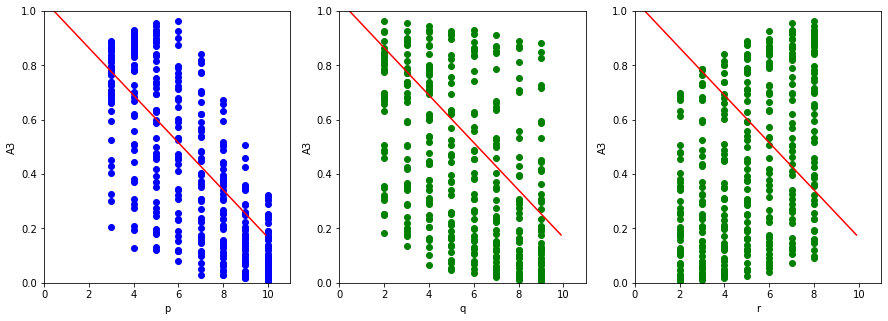

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(train.p, train.A3,  color='blue')
plt.xlabel("p")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX + regr.coef_[0][2]*XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,11)

plt.subplot(1,3,2)
plt.scatter(train.q, train.A3,  color='green')
plt.xlabel("q")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )

plt.subplot(1,3,3)
plt.scatter(train.r, train.A3,  color='green')
plt.xlabel("r")
plt.ylabel("A3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )


In [ ]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)

from sklearn.metrics import r2_score 

print('Variance score: %.2f' % r2_score(y, y_hat))

Variance score: 0.85


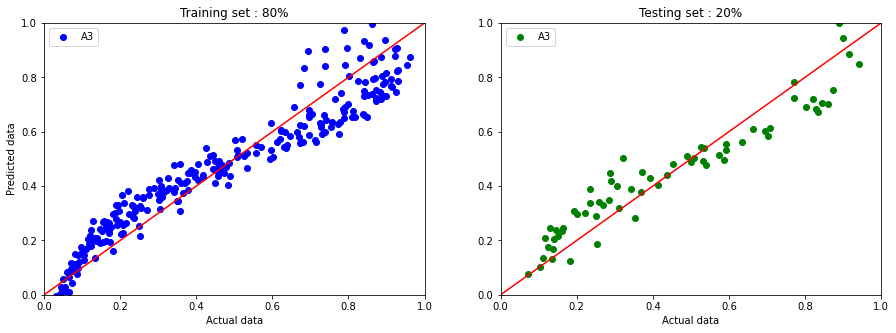

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y_pred_train = regr.intercept_[0]+ regr.coef_[0][0]*x_train[:,0] + regr.coef_[0][1]*x_train[:,1] + regr.coef_[0][2]*x_train[:,2]
plt.scatter(  y_train , y_pred_train, color='blue' , label='A3')
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
XX = np.arange(0.0, 10.0, 0.1)
#yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX
yy = XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Training set : 80%')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Actual data")

yy = XX
plt.plot(XX, yy, '-r' )
y_pred_test = regr.intercept_[0]+ regr.coef_[0][0]*x_test[:,0] + regr.coef_[0][1]*x_test[:,1] + regr.coef_[0][2]*x_test[:,2]
plt.ylim(0,1)
plt.xlim(0,1)
plt.scatter( y_test ,y_pred_test,  color='green', label='A3')
plt.title('Testing set : 20%')
plt.legend()

In [ ]:
y_train.shape

2

In [ ]:
print(y_pred_train)

[ 0.80618455  0.33134282  1.1518373   0.14633618  0.26223512  0.19108334
  0.36572123  0.99611241  0.84056296  0.5054544   0.56349159  0.65573175
  0.27277931  0.76396364  0.61895838 -0.28118798  0.21474212  0.38920458
  0.28624478  0.37866039  1.02521872  0.47072511  0.63734507  0.36009826
  0.86949383  0.66082841  0.03008635  0.00115548  0.72958523  0.62662544
  0.23857634  0.3835816   0.47634808  0.57930788  0.22276006  0.9036968
  0.68975928 -0.13073519  0.45251386  0.56074575  0.56858825  0.33661492
  0.32571985  0.80361415  0.42375843  0.91968853  0.31260526  0.30733316
 -0.06215381  0.48671683  0.77707823  0.59769456  0.72431313  0.88003802
  0.41286336  0.26768266  0.46323349  0.83529086  0.65555631  0.215093
  0.15670493  0.27840229  0.38375704  0.24912053 -0.00394118  0.48179562
  0.37591454  0.43412718  0.82200083  0.3999242   0.90387224  0.20947003
  0.74557695  0.30990356  0.55804406  0.32027231  0.43652214  0.21748796
  0.59751912  0.01971761  0.62152878  0.28349894  0.38

In [ ]:
print(y_test)

[[0.30575494]
 [0.59346403]
 [0.14481022]
 [0.12486867]
 [0.25277455]
 [0.539371  ]
 [0.77146986]
 [0.14008864]
 [0.35190879]
 [0.80268789]
 [0.45433415]
 [0.13077226]
 [0.86066865]
 [0.11608811]
 [0.53249157]
 [0.69538692]
 [0.58628936]
 [0.37195696]
 [0.82012222]
 [0.19418268]
 [0.34230493]
 [0.82801051]
 [0.43841688]
 [0.83524753]
 [0.28908197]
 [0.25829197]
 [0.36864374]
 [0.66222851]
 [0.39280442]
 [0.10236908]
 [0.2858287 ]
 [0.0111526 ]
 [0.23509577]
 [0.41304329]
 [0.15037509]
 [0.01826939]
 [0.90079245]
 [0.23384829]
 [0.07099253]
 [0.63341047]
 [0.87376386]
 [0.20171492]
 [0.1626185 ]
 [0.26826206]
 [0.88963855]
 [0.50124455]
 [0.3216111 ]
 [0.69402994]
 [0.49039703]
 [0.8442261 ]
 [0.50758148]
 [0.18355976]
 [0.53531935]
 [0.70204903]
 [0.22258384]
 [0.01177539]
 [0.31156346]
 [0.13677259]
 [0.52550297]
 [0.28818519]
 [0.13543821]
 [0.91603941]
 [0.16355796]
 [0.70888336]
 [0.77126872]
 [0.11183386]
 [0.25128141]
 [0.59323345]
 [0.57451526]
 [0.94318021]]


In [ ]:
print(y_pred_test)

[ 0.39957332  0.55564909  0.23875178  0.17526705  0.18838165  0.47617264
  0.78252577  0.20419793  0.28079725  0.69011016  0.48162018  0.24419932
  0.70065435  0.20982091  0.49216437  1.08852801  0.49743646  0.4526893
  0.7188656   0.30715772  0.38902914  0.68226767  0.44196967  0.67154804
  0.41796001  0.34153613  0.37848495  0.60841419  0.42885508  0.10141358
  0.34937863 -0.2178787   0.33626404  0.40502086  0.21491756 -0.12546309
  0.94334731  0.3888537   0.0777548   0.56314071  0.75341945  0.29678897
  0.23330425  0.33099194  1.0013845   0.48689227  0.50492808  0.60296666
  0.51072649  0.70592645  0.50510352  0.12507236  0.53948193  0.58457997
  0.30206107 -0.22315079  0.32044775  0.16999496  0.5451049   0.44689089
  0.13034445  0.88531012  0.24402388  0.61368629  0.72413769  0.13579199
  0.29134144  0.53420983  0.51582315  0.85093171]


In [ ]:
df1 = pd.DataFrame({'A3_train':[list_1]})
df2 = pd.DataFrame({'A3_pred_train' : [ y_pred_train]})
df1 = df1.reset_index()
df2 = df2.reset_index()
dff = [ df1, df2]
df_final = pd.concat(dff, axis=1)

#pd.concat([df,df1,df2], ignore_index=True)
#df['A3_train'] = y_train
#df['A3_pred_train'] = y_pred_train
#df['A3_test'] = y_test
#df['A3_pred_test'] = y_pred_test
pd.concat([df1,df2],axis=1)
df_final.head(11)

NameError: ignored

In [ ]:
df.to_csv('A3pqrt&tmtb.csv')
path = '/content/gdrive/My Drive/Colab Notebooks/A3pqrt&tmtb.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)